In [1]:
import matplotlib.pyplot as plt
import math
import random
import datetime as dt
import numpy as np
import copy
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd
from scipy.stats import ttest_rel, norm
%matplotlib inline

In [2]:
xls = pd.ExcelFile('data.xlsx')

In [3]:
ind = pd.read_excel(xls, 'industrialisation')

In [4]:
ind.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Afghanistan,3786,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
1,AFG,Afghanistan,3787,Competitive Industrial Performance Rank,Rank,122.000000,122.000000,127.000000,131.000000,133.000000,...,130.000000,132.000000,133.000000,131.000000,137.000000,136.000000,138.000000,139.000000,138.000000,138.000000
2,AFG,Afghanistan,3788,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,AFG,Afghanistan,3789,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,AFG,Afghanistan,3790,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037


In [5]:
del ind['Country ISO3']
ind.head()

,Country Name,Indicator Id,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,3786,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
1,Afghanistan,3787,Competitive Industrial Performance Rank,Rank,122.000000,122.000000,127.000000,131.000000,133.000000,135.000000,...,130.000000,132.000000,133.000000,131.000000,137.000000,136.000000,138.000000,139.000000,138.000000,138.000000
2,Afghanistan,3788,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,3789,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,3790,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037


In [6]:
del ind['Indicator Id']
ind.head()

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
1,Afghanistan,Competitive Industrial Performance Rank,Rank,122.000000,122.000000,127.000000,131.000000,133.000000,135.000000,136.000000,...,130.000000,132.000000,133.000000,131.000000,137.000000,136.000000,138.000000,139.000000,138.000000,138.000000
2,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037


In [7]:
ind = ind[ind['Subindicator Type'] == 'Value']
ind.head()

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
2,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037
5,Afghanistan,Impact of a country on World Manufacturing Val...,Value,0.000326,0.000287,0.000174,0.000112,0.000066,0.000062,0.000072,...,0.000185,0.000179,0.000177,0.000179,0.000201,0.000190,0.000188,0.000198,0.000196,0.000192


In [8]:
ind.groupby(['Country Name','Indicator']).mean()
ind

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
2,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037
5,Afghanistan,Impact of a country on World Manufacturing Val...,Value,0.000326,0.000287,0.000174,0.000112,0.000066,0.000062,0.000072,...,0.000185,0.000179,0.000177,0.000179,0.000201,0.000190,0.000188,0.000198,0.000196,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,Zambia,Manufactured Exports per capita,Value,10.238166,10.238166,10.238166,10.238166,10.238166,14.165118,17.693958,...,46.121939,76.449490,85.167418,126.534840,88.009346,106.503459,116.395458,127.878237,182.339152,114.488745
2836,Zambia,Manufactured Exports per capita index,Value,0.000610,0.000610,0.000610,0.000610,0.000605,0.000739,0.000897,...,0.001619,0.002508,0.002368,0.003288,0.002919,0.003259,0.003076,0.003575,0.004515,0.001835
2837,Zambia,Industrial export quality index,Value,0.147558,0.147343,0.146926,0.146333,0.145691,0.146692,0.165035,...,0.194684,0.200606,0.205902,0.237435,0.235990,0.185349,0.258336,0.209226,0.259836,0.220515
2838,Zambia,Manufactured Exports share in total exports,Value,0.093680,0.093680,0.093680,0.093680,0.093680,0.118704,0.173301,...,0.292314,0.238896,0.223365,0.309147,0.261759,0.195501,0.176308,0.192200,0.250237,0.177513


In [9]:
ind.reset_index(drop=True)

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
1,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
3,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037
4,Afghanistan,Impact of a country on World Manufacturing Val...,Value,0.000326,0.000287,0.000174,0.000112,0.000066,0.000062,0.000072,...,0.000185,0.000179,0.000177,0.000179,0.000201,0.000190,0.000188,0.000198,0.000196,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,Zambia,Manufactured Exports per capita,Value,10.238166,10.238166,10.238166,10.238166,10.238166,14.165118,17.693958,...,46.121939,76.449490,85.167418,126.534840,88.009346,106.503459,116.395458,127.878237,182.339152,114.488745
2694,Zambia,Manufactured Exports per capita index,Value,0.000610,0.000610,0.000610,0.000610,0.000605,0.000739,0.000897,...,0.001619,0.002508,0.002368,0.003288,0.002919,0.003259,0.003076,0.003575,0.004515,0.001835
2695,Zambia,Industrial export quality index,Value,0.147558,0.147343,0.146926,0.146333,0.145691,0.146692,0.165035,...,0.194684,0.200606,0.205902,0.237435,0.235990,0.185349,0.258336,0.209226,0.259836,0.220515
2696,Zambia,Manufactured Exports share in total exports,Value,0.093680,0.093680,0.093680,0.093680,0.093680,0.118704,0.173301,...,0.292314,0.238896,0.223365,0.309147,0.261759,0.195501,0.176308,0.192200,0.250237,0.177513


In [10]:
ind.groupby(['Country Name','Indicator']).mean()

1990  \
Country Name Indicator                                                      
Afghanistan  Competitive Industrial Performance Quintile         0.100000   
             Competitive Industrial Performance Score            0.005707   
             Impact of a country on World Manufactures Trade     0.000014   
             Impact of a country on World Manufacturing Valu...  0.000326   
             Industrial export quality index                     0.146675   
...                                                                   ...   
Zambia       Share of MVA in GDP index                           0.211784   
             Share of Medium and High-Tech Activities in Man...  0.205115   
             Share of Medium and High-Tech Activities in Tot...  0.230639   
             Share of manufactured exports in total exports ...  0.090001   
             Share of world MVA index                            0.000805   

                                                                     1991  \
Country Name Indicator                                                      
Afghanistan  Competitive Industrial Performance Quintile         0.100000   
             Competitive Industrial Performance Score            0.005429   
             Impact of a country on World Manufactures Trade     0.000014   
             Impact of a country on World Manufacturing Valu...  0.000287   
             Industrial export quality index                     0.146954   
...                                                                   ...   
Zambia       Share of MVA in GDP index                           0.196567   
             Share of Medium and High-Tech Activities in Man...  0.204515   
             Share of Medium and High-Tech Activities in Tot...  0.135434   
             Share of manufactured exports in total exports ...  0.090172   
             Share of world MVA index                            0.000769   

                                                                     1992  \
Country Name Indicator                                                      
Afghanistan  Competitive Industrial Performance Quintile         0.100000   
             Competitive Industrial Performance Score            0.004259   
             Impact of a country on World Manufactures Trade     0.000014   
             Impact of a country on World Manufacturing Valu...  0.000174   
             Industrial export quality index                     0.147651   
...                                                                   ...   
Zambia       Share of MVA in GDP index                           0.230973   
             Share of Medium and High-Tech Activities in Man...  0.203251   
             Share of Medium and High-Tech Activities in Tot...  0.133648   
             Share of manufactured exports in total exports ...  0.090600   
             Share of world MVA index                            0.000849   

                                                                     1993  \
Country Name Indicator                                                      
Afghanistan  Competitive Industrial Performance Quintile         0.100000   
             Competitive Industrial Performance Score            0.003535   
             Impact of a country on World Manufactures Trade     0.000014   
             Impact of a country on World Manufacturing Valu...  0.000112   
             Industrial export quality index                     0.147534   
...                                                                   ...   
Zambia       Share of MVA in GDP index                           0.199049   
             Share of Medium and High-Tech Activities in Man...  0.202137   
             Share of Medium and High-Tech Activities in Tot...  0.225033   
             Share of manufactured exports in total exports ...  0.090528   
             Share of world MVA index                            0.000753   

                                                             

In [11]:
ind.head()

,Country Name,Indicator,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Competitive Industrial Performance Score,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
2,Afghanistan,Competitive Industrial Performance Quintile,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Impact of a country on World Manufactures Trade,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Share in world manufacturing exports index,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037
5,Afghanistan,Impact of a country on World Manufacturing Val...,Value,0.000326,0.000287,0.000174,0.000112,0.000066,0.000062,0.000072,...,0.000185,0.000179,0.000177,0.000179,0.000201,0.000190,0.000188,0.000198,0.000196,0.000192


In [12]:
del ind['Indicator']
ind

,Country Name,Subindicator Type,1990,1991,1992,1993,1994,1995,1996,1997,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Value,0.005707,0.005429,0.004259,0.003535,0.002747,0.002525,0.002703,0.002907,...,0.003767,0.003643,0.003469,0.003545,0.002748,0.002630,0.001976,0.002277,0.002094,0.001994
2,Afghanistan,Value,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,Afghanistan,Value,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000008,0.000007,0.000004,0.000006,0.000006,0.000006
4,Afghanistan,Value,0.000094,0.000094,0.000100,0.000106,0.000109,0.000116,0.000114,0.000106,...,0.000120,0.000121,0.000121,0.000114,0.000062,0.000049,0.000028,0.000036,0.000034,0.000037
5,Afghanistan,Value,0.000326,0.000287,0.000174,0.000112,0.000066,0.000062,0.000072,0.000082,...,0.000185,0.000179,0.000177,0.000179,0.000201,0.000190,0.000188,0.000198,0.000196,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,Zambia,Value,10.238166,10.238166,10.238166,10.238166,10.238166,14.165118,17.693958,34.984543,...,46.121939,76.449490,85.167418,126.534840,88.009346,106.503459,116.395458,127.878237,182.339152,114.488745
2836,Zambia,Value,0.000610,0.000610,0.000610,0.000610,0.000605,0.000739,0.000897,0.001885,...,0.001619,0.002508,0.002368,0.003288,0.002919,0.003259,0.003076,0.003575,0.004515,0.001835
2837,Zambia,Value,0.147558,0.147343,0.146926,0.146333,0.145691,0.146692,0.165035,0.182332,...,0.194684,0.200606,0.205902,0.237435,0.235990,0.185349,0.258336,0.209226,0.259836,0.220515
2838,Zambia,Value,0.093680,0.093680,0.093680,0.093680,0.093680,0.118704,0.173301,0.290233,...,0.292314,0.238896,0.223365,0.309147,0.261759,0.195501,0.176308,0.192200,0.250237,0.177513


In [13]:
ind = ind.groupby(['Country Name',]).mean().reset_index()

In [14]:
ind

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,8.618527,7.105403,4.103683,2.580453,1.615262,1.524281,1.684774,1.892916,2.157487,...,3.821820,3.822620,3.878188,3.880562,3.789575,3.843404,3.809369,4.016244,3.977670,3.942607
1,Albania,11.244720,8.018408,5.407091,5.178006,5.083497,5.372549,5.672462,3.734698,5.768606,...,10.098178,12.004243,26.327666,17.186612,26.031790,31.734786,37.670661,34.934655,37.826647,28.348529
2,Algeria,17.021959,16.688606,15.865247,14.509442,13.082969,13.029478,12.512571,13.597244,11.755606,...,20.524396,22.067479,25.286463,30.336878,22.839472,30.523373,35.474046,32.651962,30.735367,37.885507
3,Argentina,61.994976,66.373124,71.368613,74.814138,78.851487,84.616053,87.981024,97.203723,98.559976,...,104.647598,117.216155,129.378861,140.189922,125.876985,142.333474,161.532680,155.177733,150.292971,141.561523
4,Armenia,32.803999,33.691962,11.291192,12.252314,12.602208,13.011789,13.238564,13.476978,13.280529,...,27.346427,27.376478,27.231714,29.246827,21.707724,26.775756,30.701381,33.707683,36.765651,38.516733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,77.955430,77.163803,77.666416,71.457843,76.183644,75.186492,78.786687,84.084826,85.158651,...,89.666817,95.715556,105.358989,118.211887,110.352428,121.474219,132.877963,133.404224,133.713546,140.021669
138,"Venezuela, RB",116.583706,135.079133,133.836152,131.714885,127.006390,137.394244,131.466939,134.832250,126.669573,...,138.632185,110.621583,112.171818,143.756389,133.266057,131.911208,98.473250,139.457600,115.907016,109.135946
139,Vietnam,5.243689,5.404668,5.612348,5.809581,6.019796,6.346937,6.720252,7.117924,7.194183,...,19.326040,23.177147,27.957222,33.752037,33.435174,42.134326,53.483243,63.152348,74.802809,84.743983
140,"Yemen, Rep.",2.077223,2.308132,2.378112,2.389773,2.152540,2.414869,5.026308,4.851515,4.860771,...,6.197340,6.647009,7.374656,7.807930,7.200149,7.440860,6.522883,6.791391,7.258654,5.709018


In [15]:
ind['Country Name']

0        Afghanistan
1            Albania
2            Algeria
3          Argentina
4            Armenia
           ...      
137          Uruguay
138    Venezuela, RB
139          Vietnam
140      Yemen, Rep.
141           Zambia
Name: Country Name, Length: 142, dtype: object

In [16]:
ind[1992]

0        4.103683
1        5.407091
2       15.865247
3       71.368613
4       11.291192
          ...    
137     77.666416
138    133.836152
139      5.612348
140      2.378112
141      6.567910
Name: 1992, Length: 142, dtype: float64

In [17]:
# above object gives global mean and stdv of industrialisation index for a given year

#normalisation

In [18]:
ind

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,8.618527,7.105403,4.103683,2.580453,1.615262,1.524281,1.684774,1.892916,2.157487,...,3.821820,3.822620,3.878188,3.880562,3.789575,3.843404,3.809369,4.016244,3.977670,3.942607
1,Albania,11.244720,8.018408,5.407091,5.178006,5.083497,5.372549,5.672462,3.734698,5.768606,...,10.098178,12.004243,26.327666,17.186612,26.031790,31.734786,37.670661,34.934655,37.826647,28.348529
2,Algeria,17.021959,16.688606,15.865247,14.509442,13.082969,13.029478,12.512571,13.597244,11.755606,...,20.524396,22.067479,25.286463,30.336878,22.839472,30.523373,35.474046,32.651962,30.735367,37.885507
3,Argentina,61.994976,66.373124,71.368613,74.814138,78.851487,84.616053,87.981024,97.203723,98.559976,...,104.647598,117.216155,129.378861,140.189922,125.876985,142.333474,161.532680,155.177733,150.292971,141.561523
4,Armenia,32.803999,33.691962,11.291192,12.252314,12.602208,13.011789,13.238564,13.476978,13.280529,...,27.346427,27.376478,27.231714,29.246827,21.707724,26.775756,30.701381,33.707683,36.765651,38.516733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,77.955430,77.163803,77.666416,71.457843,76.183644,75.186492,78.786687,84.084826,85.158651,...,89.666817,95.715556,105.358989,118.211887,110.352428,121.474219,132.877963,133.404224,133.713546,140.021669
138,"Venezuela, RB",116.583706,135.079133,133.836152,131.714885,127.006390,137.394244,131.466939,134.832250,126.669573,...,138.632185,110.621583,112.171818,143.756389,133.266057,131.911208,98.473250,139.457600,115.907016,109.135946
139,Vietnam,5.243689,5.404668,5.612348,5.809581,6.019796,6.346937,6.720252,7.117924,7.194183,...,19.326040,23.177147,27.957222,33.752037,33.435174,42.134326,53.483243,63.152348,74.802809,84.743983
140,"Yemen, Rep.",2.077223,2.308132,2.378112,2.389773,2.152540,2.414869,5.026308,4.851515,4.860771,...,6.197340,6.647009,7.374656,7.807930,7.200149,7.440860,6.522883,6.791391,7.258654,5.709018


In [19]:
def normalize(df):
    df2 = df.copy()
    del df2['Country Name']
    result = df.copy()
    for feature_name in df2.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - int(min_value)) / (int(max_value) - int(min_value))
    return result

ind_n = normalize(ind)
ind_n

# After Normalising the data

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.007475,0.006157,0.003544,0.002217,0.001375,0.001196,0.001286,0.001485,0.001758,...,0.002055,0.001965,0.001738,0.001642,0.002015,0.001756,0.001559,0.001266,0.001222,0.000892
1,Albania,0.009753,0.006948,0.004669,0.004448,0.004326,0.004217,0.004330,0.002929,0.004701,...,0.005429,0.006172,0.011801,0.007273,0.013839,0.014497,0.015414,0.014240,0.015118,0.008292
2,Algeria,0.014763,0.014462,0.013701,0.012465,0.011134,0.010227,0.009552,0.010665,0.009581,...,0.011035,0.011346,0.011334,0.012838,0.012142,0.013944,0.014515,0.013282,0.012207,0.011184
3,Argentina,0.053768,0.057516,0.061631,0.064273,0.067108,0.066418,0.067161,0.076238,0.080326,...,0.056262,0.060265,0.057991,0.059327,0.066920,0.065022,0.066094,0.064699,0.061286,0.042620
4,Armenia,0.028451,0.029196,0.009751,0.010526,0.010725,0.010213,0.010106,0.010570,0.010824,...,0.014702,0.014075,0.012206,0.012377,0.011541,0.012232,0.012562,0.013725,0.014682,0.011376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,0.067611,0.066866,0.067069,0.061390,0.064837,0.059016,0.060143,0.065949,0.069404,...,0.048208,0.049211,0.047225,0.050026,0.058667,0.055493,0.054369,0.055562,0.054480,0.042153
138,"Venezuela, RB",0.101113,0.117053,0.115575,0.113157,0.108091,0.107845,0.100356,0.105751,0.103235,...,0.074533,0.056875,0.050279,0.060836,0.070849,0.060261,0.040292,0.058102,0.047170,0.032788
139,Vietnam,0.004548,0.004683,0.004847,0.004991,0.005123,0.004982,0.005130,0.005583,0.005863,...,0.010390,0.011916,0.012531,0.014284,0.017775,0.019248,0.021883,0.026082,0.030297,0.025392
140,"Yemen, Rep.",0.001802,0.002000,0.002054,0.002053,0.001832,0.001896,0.003837,0.003805,0.003962,...,0.003332,0.003417,0.003306,0.003304,0.003828,0.003399,0.002669,0.002430,0.002569,0.001428


In [29]:
sample_size = 70
ind_s = ind.iloc[[random.randint(0,141) for j in range(sample_size)]] 
ind_s

#below we see a sample dataset from our population which was randomly sampled,
# Countries below were randomly sampled

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
111,Senegal,8.552391,8.218016,8.302297,7.974404,7.540053,8.324824,8.391970,8.116859,9.199445,...,11.676897,8.264849,11.423360,14.022017,12.470853,12.809633,13.598438,13.014700,12.360868,12.559861
102,Peru,26.489952,27.419047,26.405541,26.853772,30.537145,32.160110,32.252683,33.631231,31.864053,...,48.756934,56.408860,66.498633,71.213908,61.238713,73.837423,85.069817,86.615763,83.902857,82.066680
115,Slovenia,317.724658,298.458685,279.802421,260.103773,268.976484,333.737014,342.236157,353.062349,373.767824,...,645.954192,722.697432,876.112444,936.439484,731.753476,785.179844,885.631556,837.785310,870.116743,926.304668
15,Bermuda,72.290960,72.311159,70.225491,71.035472,72.325115,76.743198,77.029362,80.599999,86.551629,...,79.306600,77.378579,75.948382,73.313373,73.264687,68.408216,64.882088,56.374649,62.134945,52.080345
19,Brazil,77.303565,75.809777,73.103587,78.524142,83.690913,86.889776,85.617931,87.003869,82.392229,...,100.824506,104.203862,110.653058,117.985789,100.206122,116.355700,124.385973,117.218724,121.456328,112.322919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Czech Republic,160.560527,132.873342,129.885329,129.391836,141.389653,186.091257,199.266828,208.075454,237.821632,...,536.757073,650.040314,789.815586,903.940053,713.073463,819.391889,991.221266,952.446549,970.501152,1043.633454
97,Oman,34.923211,40.241206,44.239405,51.270831,52.119403,54.551791,55.916925,67.781864,68.264119,...,106.955677,137.099007,184.671141,230.196874,187.888402,213.193011,225.124766,253.522407,222.810524,220.682812
82,Malaysia,110.995175,128.865012,146.867572,169.185428,202.456869,238.442366,254.481926,257.711941,232.259335,...,354.828904,386.641175,407.066431,386.222618,355.458228,421.620757,453.928578,453.490873,448.679753,459.368171
130,Tunisia,38.427860,40.379284,42.503864,42.096095,47.951960,53.123827,52.807091,54.826171,57.144255,...,79.860253,85.769769,97.550809,116.729942,96.853748,103.479535,106.649791,105.362940,105.866827,106.405684


In [30]:
d = dict()
for i in range(15):
    d[1990 + i] = { 'mean': np.mean(ind[1990+i].to_list()),
                    'stdv': np.std(ind[1990+i].to_list())}
d

{1990: {'mean': 136.5592759594364, 'stdv': 207.20089342327233},
 1991: {'mean': 134.194616988803, 'stdv': 205.99777234480422},
 1992: {'mean': 135.46552344532378, 'stdv': 210.7318480063314},
 1993: {'mean': 132.64098860827966, 'stdv': 208.04656668265835},
 1994: {'mean': 142.32610541329225, 'stdv': 226.2406115044651},
 1995: {'mean': 154.6114376030973, 'stdv': 247.44563085572955},
 1996: {'mean': 156.73605548618733, 'stdv': 250.6193886871556},
 1997: {'mean': 164.70596414853134, 'stdv': 258.5032044139396},
 1998: {'mean': 166.1759366189405, 'stdv': 262.26853628954177},
 1999: {'mean': 169.77710056931008, 'stdv': 271.12877604932436},
 2000: {'mean': 179.55732431397055, 'stdv': 286.6453462262081},
 2001: {'mean': 178.94666479267275, 'stdv': 285.2975023860736},
 2002: {'mean': 185.02035073765273, 'stdv': 297.348876161278},
 2003: {'mean': 201.70738542179325, 'stdv': 324.0942905073108},
 2004: {'mean': 225.97372001928204, 'stdv': 363.8339094540087}}

In [31]:
#d gives us mean and standard deviation of global industrialisation index per year

In [36]:
#plotting normality

mu = d[1990]['mean']
stdv = d[1990]['stdv']
lower_limit = ind_n[1990].min()
upper_limit = ind_n[1990].max()

In [37]:
z1 = ( lower_limit - mu )/stdv
z2 = ( upper_limit - mu )/stdv

In [38]:
x = np.arange(z1,z2,0.001)
x_all = np.arange(-10, 10, 0.001)
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

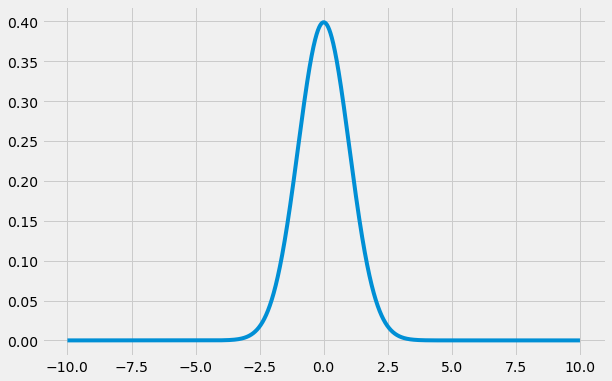

In [39]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

In [27]:
# we can clearly see that its normally distributed for the year 1990

In [40]:
ind_s
# now we will perform a two tailed z test on our sample set
# NULL Hypothesis H0: the mean of global industrialisation index != mean of our sample (147.3960189091906)
# H1: the mean of the industrialisation = mean of our sample

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
111,Senegal,8.552391,8.218016,8.302297,7.974404,7.540053,8.324824,8.391970,8.116859,9.199445,...,11.676897,8.264849,11.423360,14.022017,12.470853,12.809633,13.598438,13.014700,12.360868,12.559861
102,Peru,26.489952,27.419047,26.405541,26.853772,30.537145,32.160110,32.252683,33.631231,31.864053,...,48.756934,56.408860,66.498633,71.213908,61.238713,73.837423,85.069817,86.615763,83.902857,82.066680
115,Slovenia,317.724658,298.458685,279.802421,260.103773,268.976484,333.737014,342.236157,353.062349,373.767824,...,645.954192,722.697432,876.112444,936.439484,731.753476,785.179844,885.631556,837.785310,870.116743,926.304668
15,Bermuda,72.290960,72.311159,70.225491,71.035472,72.325115,76.743198,77.029362,80.599999,86.551629,...,79.306600,77.378579,75.948382,73.313373,73.264687,68.408216,64.882088,56.374649,62.134945,52.080345
19,Brazil,77.303565,75.809777,73.103587,78.524142,83.690913,86.889776,85.617931,87.003869,82.392229,...,100.824506,104.203862,110.653058,117.985789,100.206122,116.355700,124.385973,117.218724,121.456328,112.322919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Czech Republic,160.560527,132.873342,129.885329,129.391836,141.389653,186.091257,199.266828,208.075454,237.821632,...,536.757073,650.040314,789.815586,903.940053,713.073463,819.391889,991.221266,952.446549,970.501152,1043.633454
97,Oman,34.923211,40.241206,44.239405,51.270831,52.119403,54.551791,55.916925,67.781864,68.264119,...,106.955677,137.099007,184.671141,230.196874,187.888402,213.193011,225.124766,253.522407,222.810524,220.682812
82,Malaysia,110.995175,128.865012,146.867572,169.185428,202.456869,238.442366,254.481926,257.711941,232.259335,...,354.828904,386.641175,407.066431,386.222618,355.458228,421.620757,453.928578,453.490873,448.679753,459.368171
130,Tunisia,38.427860,40.379284,42.503864,42.096095,47.951960,53.123827,52.807091,54.826171,57.144255,...,79.860253,85.769769,97.550809,116.729942,96.853748,103.479535,106.649791,105.362940,105.866827,106.405684


In [43]:
sample_mean_1990 = np.mean(ind_s[1990].to_list())
sample_stdv_1990 = np.std(ind_s[1990].to_list())
(sample_mean_1990,
sample_stdv_1990)

(147.3960189091906, 227.10308653805012)

In [44]:
def z_test(sample_stdv, sample_mean, pop_mean, ):
    z = (sample_mean - pop_mean)/sample_stdv
    return z
z = z_test(sample_stdv_1990, sample_mean_1990, d[1990]['mean'])
z

0.04771728607897424

In [56]:
# for a 2 tailed test critical value of z should be < |1.96|
# but our z score is much lesser (0.04771728607897424)

p_value = norm.sf(abs(z))*2
p_value

0.9619415574964167

In [ ]:
# we see that our p value is >> 0.05 so we accept out NULL Hypothesis H0
#that the mean of the population = sample_mean